sources = 
* https://realpython.com/python-opencv-color-spaces/
* https://pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
* https://github.com/noorkhokhar99/skindetection
* https://github.com/CHEREF-Mehdi/SkinDetection
* https://github.com/mpatacchiola/deepgaze -----> this is the most promessing

Sacar que porcentaje de la foto es cara (boxes con cara vs total de pixeles)

In [1]:
import cv2
import numpy as np
from PIL import Image

#Open a simple image
img=cv2.imread("sample/2016-08-27_19-08-47_UTC.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)

In [2]:
global_result

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [3]:
# Save the result images
cv2.imwrite("HSV_Result.jpg", HSV_result)
cv2.imwrite("YCrCb_Result.jpg", YCrCb_result)
cv2.imwrite("Global_Result.jpg", global_result)

# Display images using Pillow
Image.open("HSV_Result.jpg").show()
Image.open("YCrCb_Result.jpg").show()
Image.open("Global_Result.jpg").show()


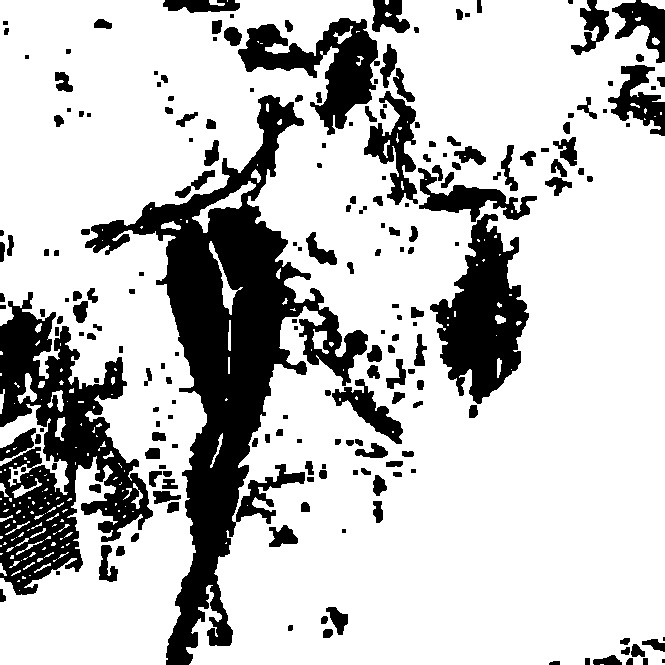

In [4]:
raw_image = Image.open('Global_Result.jpg').convert('RGB')
raw_image

## Steps

In [4]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('sample/2016-08-27_19-08-47_UTC.jpg')

# Convert to YCrCb color space
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Define skin color range in YCrCb color space
lower_skin = np.array([0, 133, 77], dtype=np.uint8)
upper_skin = np.array([255, 173, 127], dtype=np.uint8)

# Create a skin mask
skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)

# Calculate the percentage of skin in the image
skin_area = np.sum(skin_mask == 255)
total_area = image.shape[0] * image.shape[1]
skin_percentage = (skin_area / total_area) * 100

print(f"Skin covers approximately {skin_percentage:.2f}% of the image.")

Skin covers approximately 60.73% of the image.


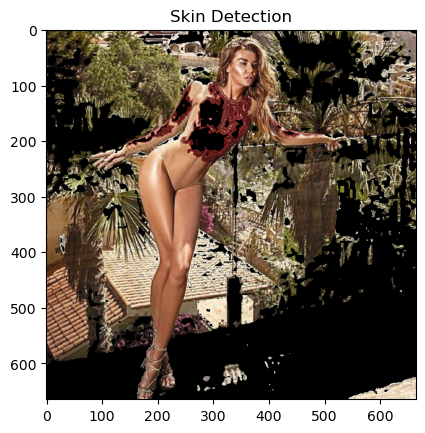

In [5]:
import matplotlib.pyplot as plt
# Display using matplotlib
skin = cv2.bitwise_and(image, image, mask=skin_mask)
plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.title('Skin Detection')
plt.show()

# Mark posts

In [6]:
import os

def get_jpg_files(folder_path, users):
    jpg_files = []
    for user in users:
        user_folder = os.path.join(folder_path, user)
        if os.path.exists(user_folder):
            for root, dirs, files in os.walk(user_folder):
                for file in files:
                    if file.endswith('.jpg'):
                        jpg_files.append(os.path.join(root, file))
        else:
            print(f"Folder not found: {user_folder}")
    return jpg_files

# Example usage
users = ['hm', 'jacquemus', 'sheinofficial', 'chanelofficial']
folder_path = '../1_download_data/'
jpg_files = get_jpg_files(folder_path, users)

In [7]:
from tqdm import tqdm
dict_skin_exposure = {}
for file in tqdm(jpg_files):
    # Read the image
    image = cv2.imread(file)
    
    # Convert to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    
    # Define skin color range in YCrCb color space
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)
    
    # Create a skin mask
    skin_mask = cv2.inRange(ycrcb, lower_skin, upper_skin)
    
    # Calculate the percentage of skin in the image
    skin_area = np.sum(skin_mask == 255)
    total_area = image.shape[0] * image.shape[1]
    skin_percentage = (skin_area / total_area) * 100
    dict_skin_exposure[file] = skin_percentage

100%|██████████████████████████████████████████████████████████████████████████████| 3988/3988 [02:34<00:00, 25.81it/s]


In [8]:
import pandas as pd
df_skin = pd.DataFrame(list(dict_skin_exposure.items()), columns=['Key', 'Skin_pct'])

# EDA Skin Exposure

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Skin_pct', ylabel='Count'>

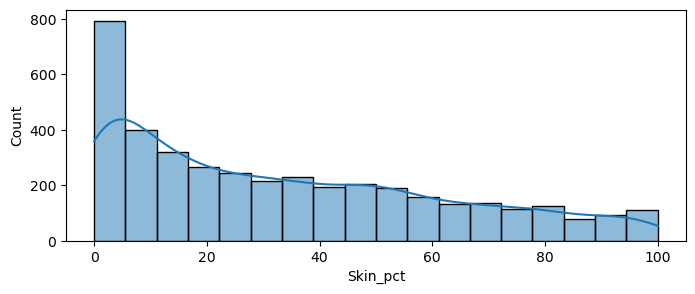

In [9]:
import seaborn as sns
plt.figure(figsize = (8,3))
sns.histplot(df_skin['Skin_pct'], kde = True)

<Axes: ylabel='Skin_pct'>

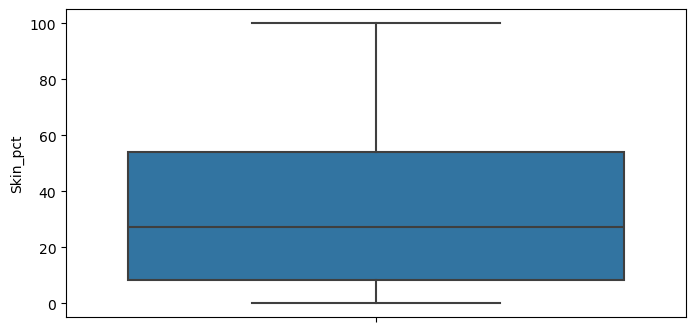

In [10]:
plt.figure(figsize = (8,4))
sns.boxplot(data = df_skin, y='Skin_pct')

In [11]:
df_skin['Skin_pct'].describe()

count    3988.000000
mean       33.581594
std        28.463490
min         0.000000
25%         8.098173
50%        27.348393
75%        53.843772
max       100.000000
Name: Skin_pct, dtype: float64

In [12]:
threshold = df_skin['Skin_pct'].quantile(0.75)
df_filter = df_skin[df_skin['Skin_pct'] >= threshold].reset_index(drop = True)
len(df_filter)

997

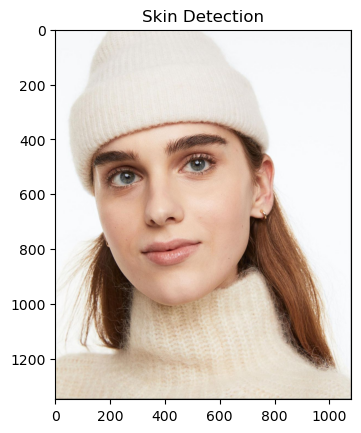

In [22]:
sample = df_filter['Key'][1]
# Read the image
image = cv2.imread(sample)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Skin Detection')
plt.show()